# Limpieza del dataset "US presidential election from 1976"

## Caso de estudio

El dataset "US 1976-2020 Presidential election analysis" incluye diversas variables que permiten un análisis detallado de las elecciones presidenciales en Estados Unidos. A continuación, se describe cada una de las variables principales incluidas en el dataset:

- **year:** Año en el que se llevó a cabo la elección presidencial.
- **state:** Nombre completo del estado donde se realizó la elección.
- **state_po:** Abreviatura postal del estado (por ejemplo, CA para California).
- **state_fips:** Código FIPS (Federal Information Processing Standards) del estado, un identificador único para cada estado.
- **state_cen:** Código censal del estado, usado por la Oficina del Censo de EE.UU.
- **state_ic:** Código ICPSR (Inter-university Consortium for Political and Social Research) del estado, otro identificador único.
- **office:** Cargo en disputa, en este caso, "Presidente".
- **candidate:** Nombre del candidato que participó en la elección.
- **party_detailed:** Nombre detallado del partido político del candidato.
- **writein:** Indicador de si los votos fueron escritos (write-in votes), es decir, votos para un candidato no oficialmente en la boleta.
- **candidatevotes:** Número de votos recibidos por el candidato.
- **totalvotes:** Número total de votos emitidos en la elección en ese estado o condado.
- **version:** Versión del dataset, útil para controlar actualizaciones y revisiones de los datos.
- **notes:** Notas adicionales sobre la elección o los datos, proporcionando contexto o explicaciones relevantes.
- **party_simplified:** Nombre simplificado del partido político (por ejemplo, "Democratic" o "Republican").
- **party:** Abreviatura del partido político del candidato.

Este conjunto de datos es particularmente útil para realizar análisis históricos y comparativos de las elecciones presidenciales en Estados Unidos, proporcionando una base sólida para entender tendencias y cambios en el comportamiento electoral a lo largo de más de cuatro décadas.

## Carga de librerías

In [2]:
# Data processing
import numpy as np
import pandas as pd 
import os

# Visual
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
os.path.abspath('1976-2020-president.csv')

'd:\\MasterUOC\\Clases\\3er_Semestre\\VisualizacionDatos\\PEC3\\Recursos\\SOL\\1976-2020-president.csv'

## Carga del dataset

In [4]:
# Carga del dataset
df_us  = pd.read_csv(r'D:\MasterUOC\Clases\3er_Semestre\VisualizacionDatos\PEC3\Recursos\SOL\dataset\1976-2020-president.csv')

## Ingeniería de características

In [5]:
# Proporción de valores nulos por columna
proporcion_nulos = df_us.isnull().mean()
proporcion_nulos

year                0.000000
state               0.000000
state_po            0.000000
state_fips          0.000000
state_cen           0.000000
state_ic            0.000000
office              0.000000
candidate           0.066947
party_detailed      0.106368
writein             0.000700
candidatevotes      0.000000
totalvotes          0.000000
version             0.000000
notes               1.000000
party_simplified    0.000000
dtype: float64

En una primera revisión tenemos que las notas registra el 100% de nulos, por ello, serán retiradas de nuestro análisis. Asimismo, tenemos que en el nombre del candiato y el nombre del partido político registran 6.69% y 10.63% de nulos, respectivamente.

El siguiente paso es revisar la estructura de datos y revisión de nulos. 

In [6]:
# Eliminación de la columna notes
df_us_clean = df_us.drop(['notes'],axis=1).reset_index(drop = True)

# Resumen estadístico de las variables numéricas
df_us_clean.describe()

,year,state_fips,state_cen,state_ic,candidatevotes,totalvotes,version
count,4287.000000,4287.000000,4287.000000,4287.000000,4.287000e+03,4.287000e+03,4287.0
mean,1999.080942,28.616982,53.665034,39.754840,3.119076e+05,2.366924e+06,20210113.0
std,14.220014,15.616459,26.029189,22.772216,7.648011e+05,2.465008e+06,0.0
min,1976.000000,1.000000,11.000000,1.000000,0.000000e+00,1.235740e+05,20210113.0
25%,1988.000000,16.000000,33.000000,22.000000,1.177000e+03,6.522740e+05,20210113.0
50%,2000.000000,28.000000,53.000000,42.000000,7.499000e+03,1.569180e+06,20210113.0
75%,2012.000000,41.000000,81.000000,61.000000,1.992415e+05,3.033118e+06,20210113.0
max,2020.000000,56.000000,95.000000,82.000000,1.111025e+07,1.750088e+07,20210113.0


In [7]:
# Revisión de la estructura de datos
df_us_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4287 entries, 0 to 4286
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   year              4287 non-null   int64 
 1   state             4287 non-null   object
 2   state_po          4287 non-null   object
 3   state_fips        4287 non-null   int64 
 4   state_cen         4287 non-null   int64 
 5   state_ic          4287 non-null   int64 
 6   office            4287 non-null   object
 7   candidate         4000 non-null   object
 8   party_detailed    3831 non-null   object
 9   writein           4284 non-null   object
 10  candidatevotes    4287 non-null   int64 
 11  totalvotes        4287 non-null   int64 
 12  version           4287 non-null   int64 
 13  party_simplified  4287 non-null   object
dtypes: int64(7), object(7)
memory usage: 469.0+ KB


Por falta de variabilidad la variable versión será retirada del análisis, lo mismo ocurre con el cargo de disputa ('Presidente').

In [8]:
# Eliminación de variable 
df_us_clean1 = df_us_clean.drop(['version', 'office'],axis=1).reset_index(drop = True)
df_us_clean1.head(3)

,year,state,state_po,state_fips,state_cen,state_ic,candidate,party_detailed,writein,candidatevotes,totalvotes,party_simplified
0,1976,ALABAMA,AL,1,63,41,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,DEMOCRAT
1,1976,ALABAMA,AL,1,63,41,"FORD, GERALD",REPUBLICAN,False,504070,1182850,REPUBLICAN
2,1976,ALABAMA,AL,1,63,41,"MADDOX, LESTER",AMERICAN INDEPENDENT PARTY,False,9198,1182850,OTHER


In [9]:
# Transformar las columnas de tipo 'String' en mayúscula
for i in df_us_clean1.select_dtypes(exclude='int').columns.tolist():
    df_us_clean1[i] = df_us_clean1[i].astype('string')
    df_us_clean1[i] = df_us_clean1[i].str.upper()

# Mostramos los datos
df_us_clean1.head(3)

,year,state,state_po,state_fips,state_cen,state_ic,candidate,party_detailed,writein,candidatevotes,totalvotes,party_simplified
0,1976,ALABAMA,AL,1,63,41,"CARTER, JIMMY",DEMOCRAT,FALSE,659170,1182850,DEMOCRAT
1,1976,ALABAMA,AL,1,63,41,"FORD, GERALD",REPUBLICAN,FALSE,504070,1182850,REPUBLICAN
2,1976,ALABAMA,AL,1,63,41,"MADDOX, LESTER",AMERICAN INDEPENDENT PARTY,FALSE,9198,1182850,OTHER


C:\Users\josel\AppData\Local\Temp\ipykernel_29748\4047444797.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=75)
C:\Users\josel\AppData\Local\Temp\ipykernel_29748\4047444797.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=75)


**************************************************
**************************************************


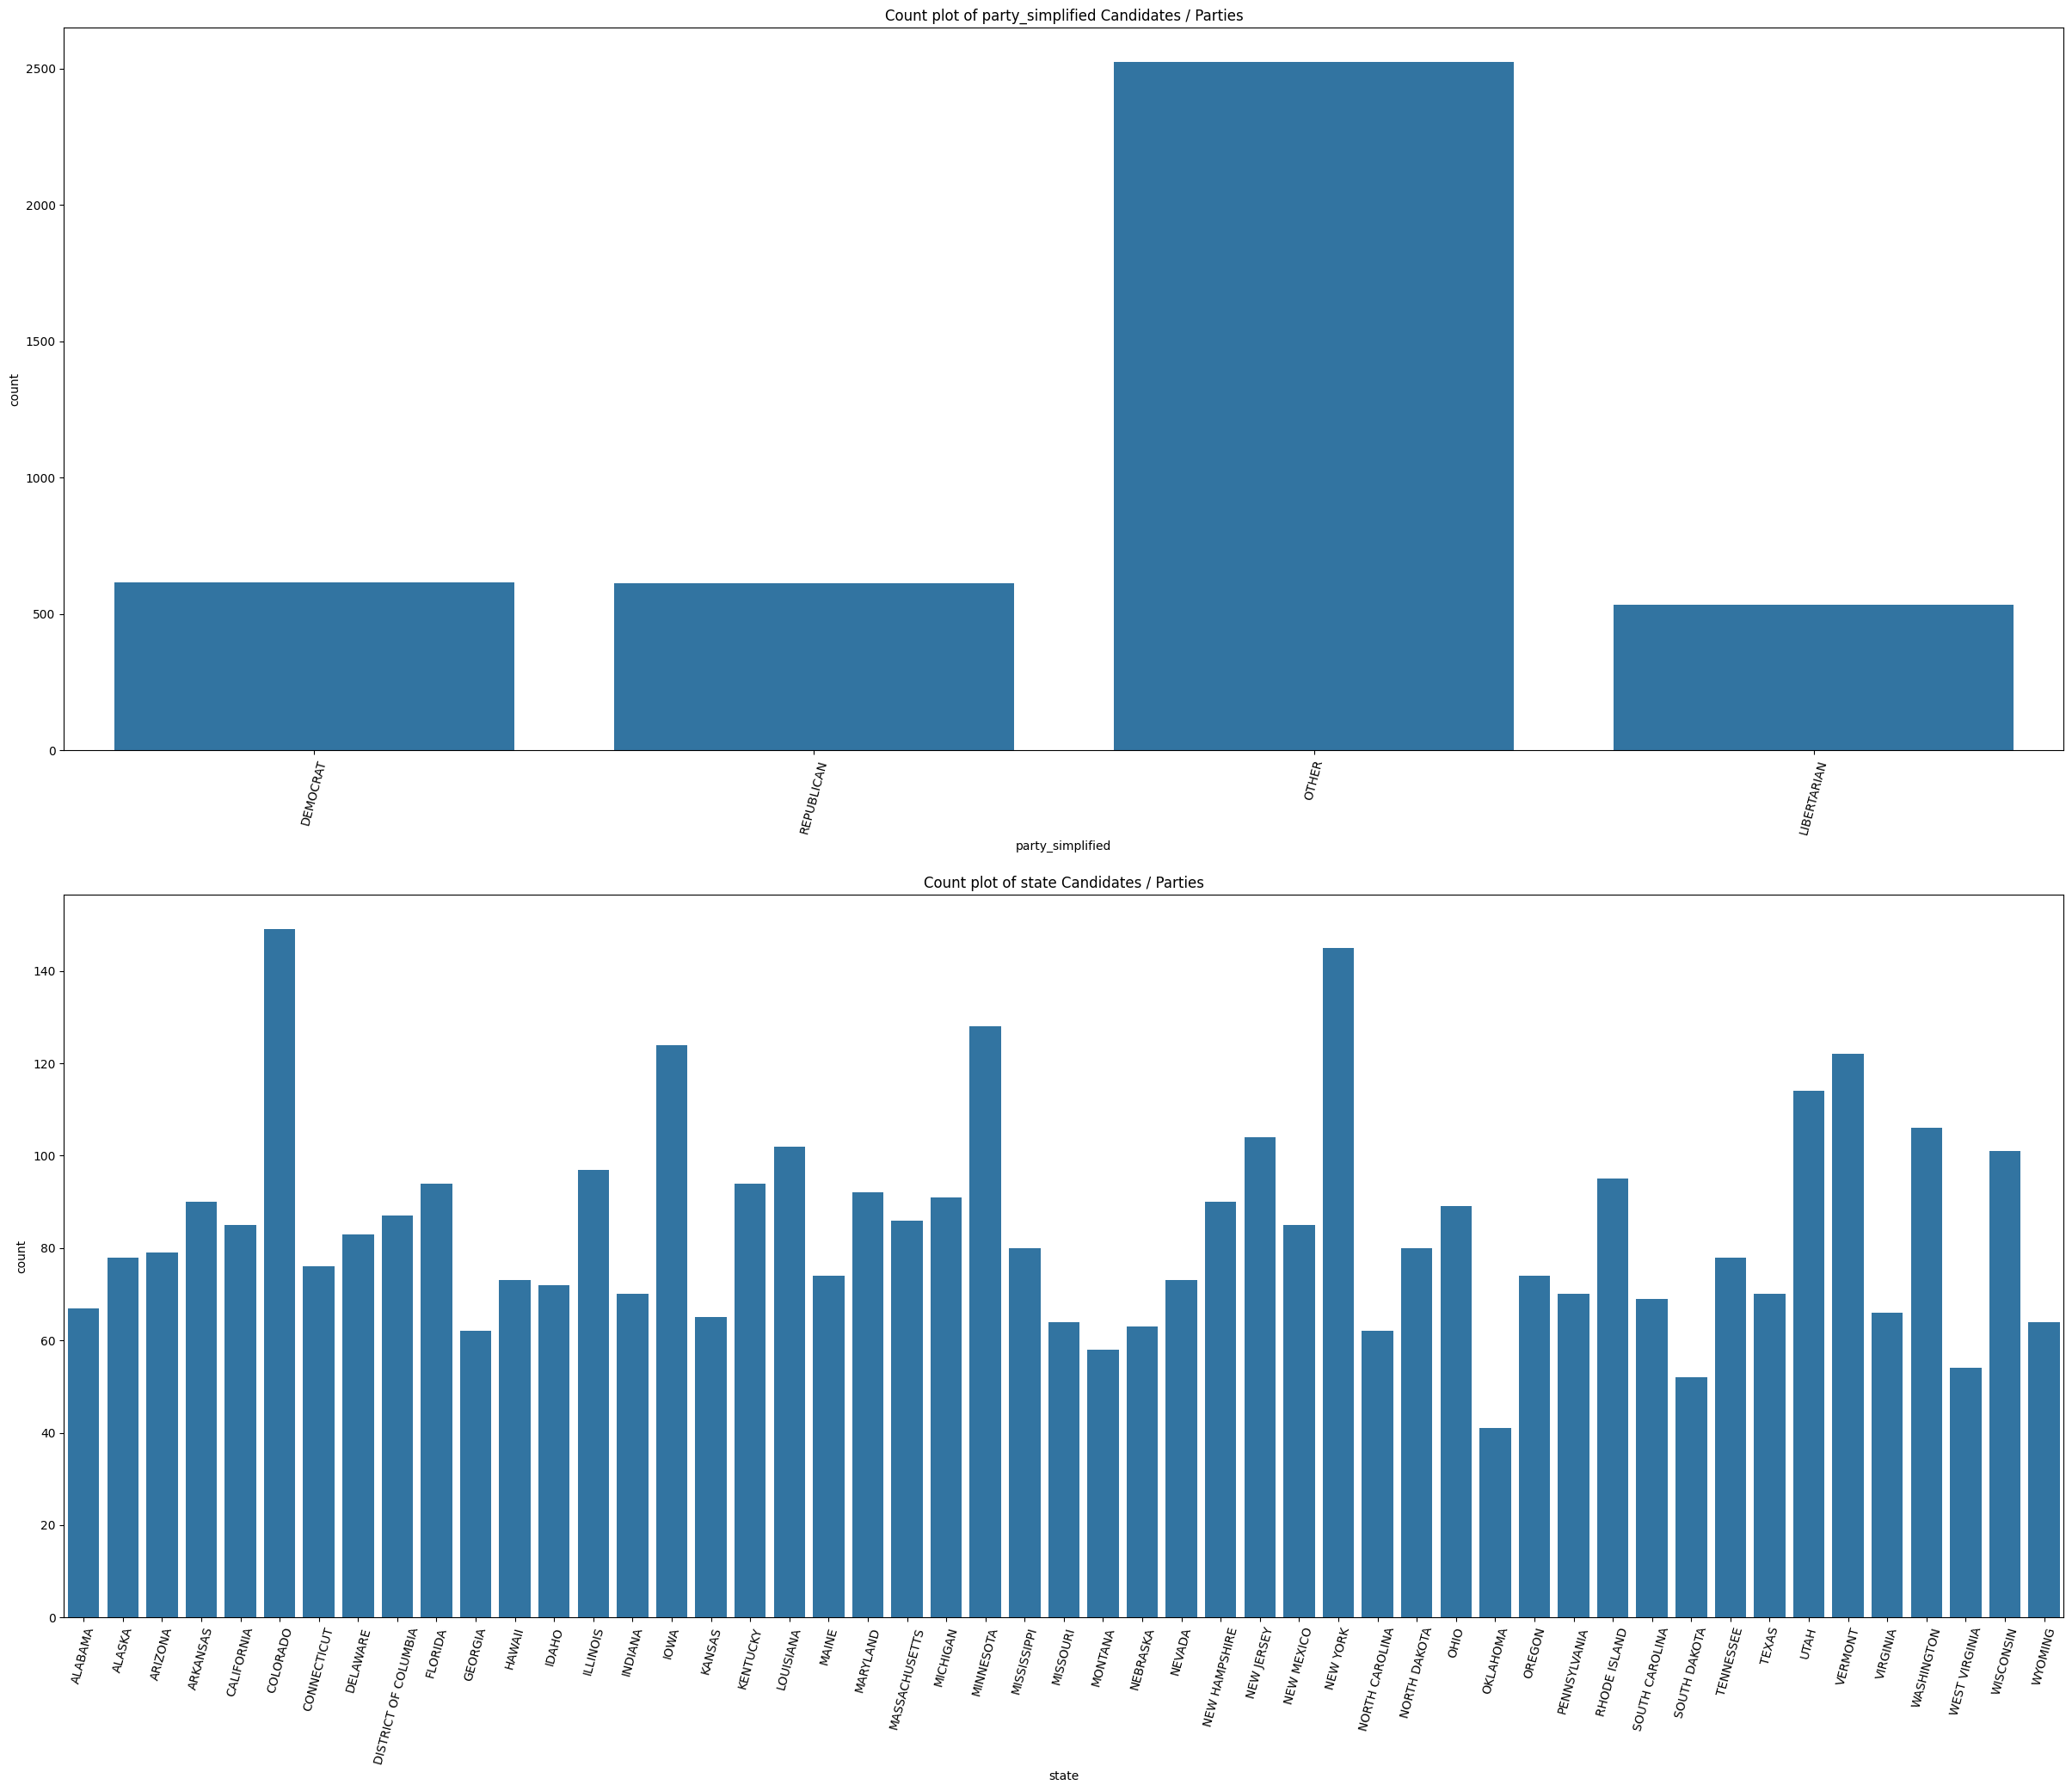

In [10]:
cols = ["party_simplified","state"]
fig,axes=plt.subplots(nrows=2,ncols=1,figsize=[30,24])
for i in range(0,len(cols)):
    axes[i]=sns.countplot(x = cols[i],data = df_us_clean1,ax=axes[i])
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=75)
    axes[i].set_title("Count plot of "+cols[i] + " Candidates / Parties")
    print("*"*50)

In [11]:
from matplotlib.ticker import FuncFormatter

# Función para formatear los valores del eje x
def abbreviate_number(x, pos):
    if x >= 1e6:
        return f'{x*1e-6:.1f}M'
    elif x >= 1e3:
        return f'{x*1e-3:.1f}k'
    else:
        return str(int(x))

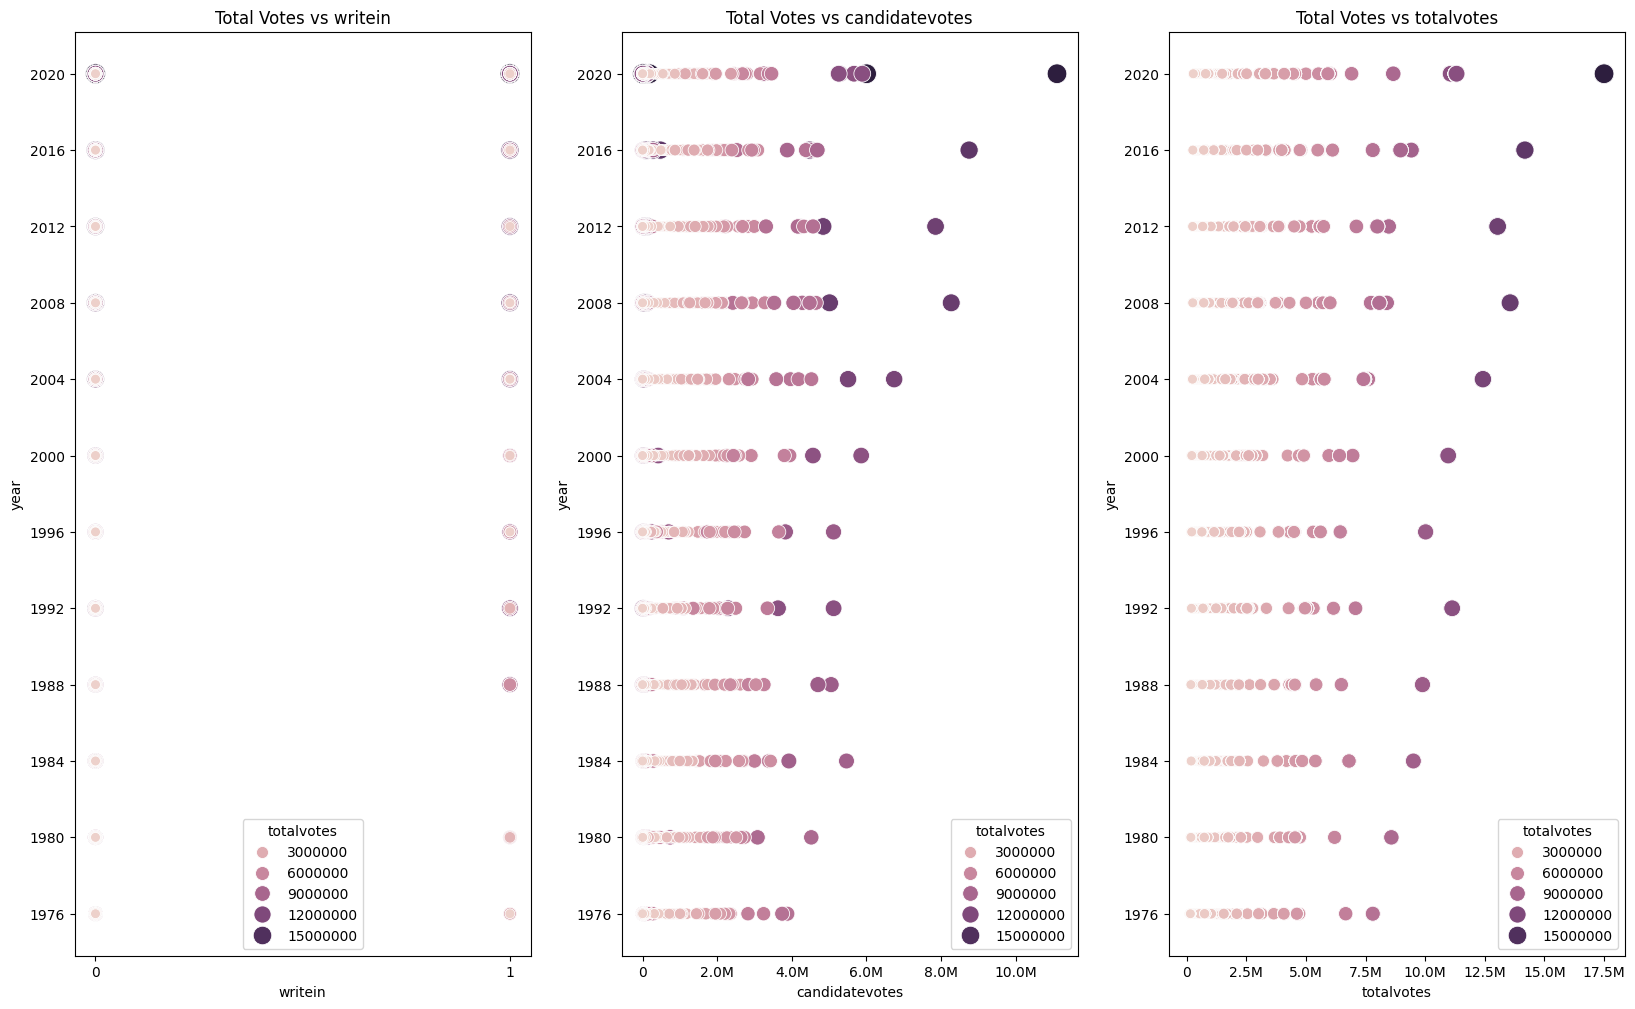

In [12]:
cols=['writein', 'candidatevotes', 'totalvotes']

fig, axes = plt.subplots(nrows=1,ncols=3,figsize=[20,12])
for i in range(0,len(cols)):
    axes[i]=sns.scatterplot( x= cols[i], y="year", 
                            data = df_us_clean1, 
                            size = "totalvotes",
                            hue = "totalvotes",
                            sizes=(50,200), 
                            # hue_norm=(0, 6),
                            # cmap="viridis",
                            ax=axes[i])
    axes[i].set_title("Total Votes vs "+cols[i])
    # Asegurar que se muestren todas las etiquetas del eje 'y'
    axes[i].set_yticks(df_us_clean1['year'].unique())
    
    # Formatear las etiquetas del eje 'x'
    axes[i].xaxis.set_major_formatter(FuncFormatter(abbreviate_number))


## Export dataset

In [13]:
df_us_clean1.to_csv(r'D:\MasterUOC\Clases\3er_Semestre\VisualizacionDatos\PEC3\Recursos\SOL\dataset\1976_2020_president_clean.csv', index = False)